## Adventure Works Database Customer Data Analysis

###### Microsoft SQL Server Management Studio (SQL)
We will be working with the Adventure Works Database in Microsoft SQL Server Management Studio. We will be focusing specifically on three columns including the database's Address table, Customer table and Customer Address table. We will be using Microsoft SQL Server Management Studio to perform base analysis. This will include writing join queries and then migrating this data into Python. This requires knowledge using Microsot SSMS and SQL language. 

###### Jupyter Notebook (Python)
Once the specific data from our database is migrated from Microsoft SSMS into Jupyer Notebook we will begin using Python packages to get interesting insights into our data. Packages we will use will include:

- Pyodbc Library

Pyodbc is an open source Python module that makes accessing ODBC databases simple.

- Numpy Library

Numerical Python known for heavy dataset computations and many other features such as time series etc.

- Pandas Library

Pandas for data analysis

- Matplotlib Library

Visualization Library

- Seaborn Library

Seaborn is a visualization library built on Matplotlib library

- Missingno Library

Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations.

- Collections Library

Several modules have been developed that provide additional data structures to store collections of data. One such module is the Python collections module.

### Import required libraries

In [1]:
import pyodbc 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter

### Setting upconnection envoirnment from Microsft SSMS to Jupyter Notebook using Pyodbc
NOTE - Remember Indentations and to use your personal SERVER & DATABASE names

Server name located (personal) Control Panel | System and Security | System

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=xxxxxxx;' # server (personal)
                      'Database=AdventureWorksLT2008R2;'
                      'Trusted_Connection=yes;')

### Importing SSMS Database into Pandas Dataframe Object

The following SQL query uses an inner join which will return only matching data from both tables used. this is a popular query and is self explanatory. Using Python's Pyodbc module we will be importing specific data and creating a pandas data frame object for data manipulation.

In [3]:
customer_data = pd.read_sql_query('SELECT * FROM SalesLT.Address AS c INNER JOIN SalesLT.CustomerAddress AS d ON c.AddressID = d.AddressID', conn)

In [4]:
customer_data.head(4)

,AddressID,AddressLine1,AddressLine2,City,StateProvince,CountryRegion,PostalCode,rowguid,ModifiedDate,CustomerID,AddressID,AddressType,rowguid,ModifiedDate
0,9,8713 Yosemite Ct.,None,Bothell,Washington,United States,98011,268AF621-76D7-4C78-9441-144FD139821A,2002-07-01,30018,9,Shipping,432BBEE2-8A6B-45E3-8915-9350F0434E3F,2002-07-01
1,11,1318 Lasalle Street,None,Bothell,Washington,United States,98011,981B3303-ACA2-49C7-9A96-FB670785B269,2003-04-01,29545,11,Shipping,3D88495A-776E-414A-A91E-6D8979A35D86,2003-04-01
2,25,9178 Jumping St.,None,Dallas,Texas,United States,75201,C8DF3BD9-48F0-4654-A8DD-14A67A84D3C6,2002-09-01,29954,25,Shipping,85666565-49E8-427A-8A2A-C7960C7E665A,2002-09-01
3,28,9228 Via Del Sol,None,Phoenix,Arizona,United States,85004,12AE5EE1-FC3E-468B-9B92-3B970B169774,2001-09-01,29897,28,Shipping,32AC1E35-A59F-4776-BA25-E64429512B5D,2001-09-01


In [5]:
customer_data.info(), customer_data.describe(include = object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AddressID      417 non-null    int64         
 1   AddressLine1   417 non-null    object        
 2   AddressLine2   11 non-null     object        
 3   City           417 non-null    object        
 4   StateProvince  417 non-null    object        
 5   CountryRegion  417 non-null    object        
 6   PostalCode     417 non-null    object        
 7   rowguid        417 non-null    object        
 8   ModifiedDate   417 non-null    datetime64[ns]
 9   CustomerID     417 non-null    int64         
 10  AddressID      417 non-null    int64         
 11  AddressType    417 non-null    object        
 12  rowguid        417 non-null    object        
 13  ModifiedDate   417 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 45.7+ KB


(None,
                     AddressLine1 AddressLine2     City StateProvince  \
 count                        417           11      417           417   
 unique                       412           11      256            25   
 top     Garamonde Drive, Wymbush     Ste 1071  Toronto    California   
 freq                           2            1       23            65   
 
         CountryRegion PostalCode                               rowguid  \
 count             417        417                                   417   
 unique              3        287                                   417   
 top     United States    T2P 2G8  EB632E56-4299-4714-9E91-224319BDCB62   
 freq              272         11                                     1   
 
         AddressType                               rowguid  
 count           417                                   417  
 unique            2                                   417  
 top     Main Office  B7CDC62A-5672-4327-9B71-2BA730134D98  
 freq

### Data Cleaning
- Missing Data Analysis

Working with this specific query in Microsoft SSMS we are informed the both tables hold consistent data apart from 1 column - Address Line 2. Considering this finding and having an understanding of SQL inner join query which will return matching rows from both tables we can determine that there will be no missing data. 

We will be removing the column (AddressLine2) mentioned above.

AddressID          0
AddressLine1       0
AddressLine2     406
City               0
StateProvince      0
CountryRegion      0
PostalCode         0
rowguid            0
ModifiedDate       0
CustomerID         0
AddressID          0
AddressType        0
rowguid            0
ModifiedDate       0
dtype: int64

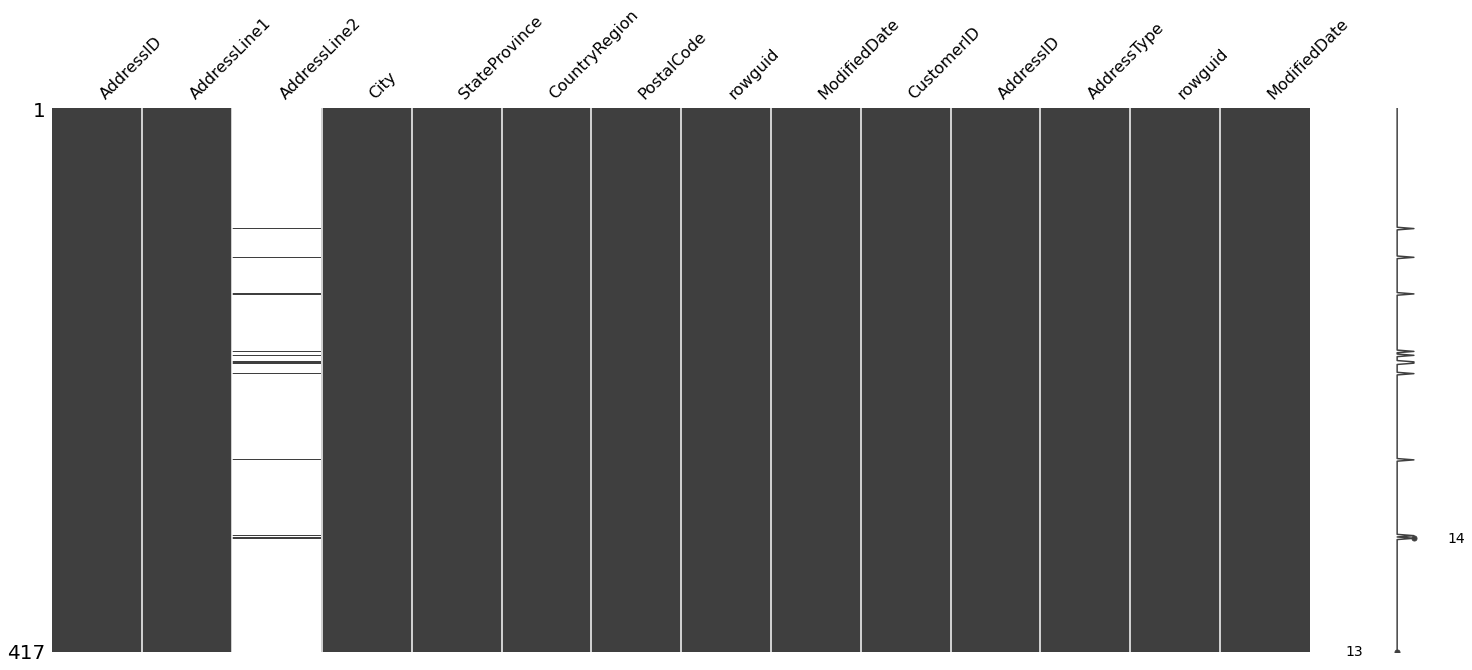

In [6]:
# Missingness Analysis
msno.matrix(customer_data) # missing data visual matrix
customer_data.isnull().sum() # Sum total of missing value's

In [7]:
customer_data = customer_data.drop(['AddressLine2'], axis=1) # drop pandas dataframe object column

We can confirm we have succesfully dropped the specific column which was made up of 97% missing data from our inevstigation analysis. 

### Duplicate Data
Completing an SQL Inner Join using two database tables we need one matching column from both tables that we can match on. For this instance we matched on the Address ID. We can see from the above we now have a duplicated column ie. two columns are the same holding the same data. We will need to drop one of the columns and user indexing to do so.

In [8]:
customer_data = customer_data.drop(customer_data.columns[[9]], axis = 1) # drop pandas dataframe object column using column indexing
customer_data = customer_data.drop(customer_data.columns[[-1]], axis = 1)

In [9]:
customer_data.head(4)

,AddressLine1,City,StateProvince,CountryRegion,PostalCode,rowguid,CustomerID,AddressType,rowguid
0,8713 Yosemite Ct.,Bothell,Washington,United States,98011,268AF621-76D7-4C78-9441-144FD139821A,30018,Shipping,432BBEE2-8A6B-45E3-8915-9350F0434E3F
1,1318 Lasalle Street,Bothell,Washington,United States,98011,981B3303-ACA2-49C7-9A96-FB670785B269,29545,Shipping,3D88495A-776E-414A-A91E-6D8979A35D86
2,9178 Jumping St.,Dallas,Texas,United States,75201,C8DF3BD9-48F0-4654-A8DD-14A67A84D3C6,29954,Shipping,85666565-49E8-427A-8A2A-C7960C7E665A
3,9228 Via Del Sol,Phoenix,Arizona,United States,85004,12AE5EE1-FC3E-468B-9B92-3B970B169774,29897,Shipping,32AC1E35-A59F-4776-BA25-E64429512B5D


We have removed the duplicated data (repeated columns) as we can see from the analysis above.

# Data Visualization 
What is interesting from the above pandas dataframe object is the categorical variables city, state/province and country/region. What we know from our analysis of the database in Microsofts SSMS is that this data can be linked to a specific customer via the customer ID. 

Next we will use this information to gather some interesting insights using data visualization libraries.


#### State Province
We will ask some specific questions:

###### 1 - What are the top 5 State/Provinces for customers ?

In [10]:
customer_data['StateProvince'].value_counts() # value counts () returns the frequency for each category value in the series

California          65
Ontario             51
Washington          48
England             38
Texas               37
Quebec              24
Oregon              17
British Columbia    17
Michigan            16
Illinois            14
Alberta             13
Arizona             13
Missouri            11
Utah                 9
Colorado             9
Nevada               7
Minnesota            7
Wisconsin            4
Wyoming              4
New Mexico           3
Montana              3
Idaho                3
South Dakota         2
Brunswick            1
Manitoba             1
Name: StateProvince, dtype: int64

In [11]:
top_states = ['California','Ontario','Washington','England','Texas'] # Create a List of Top five State Provinces
top_states_provinces = customer_data[customer_data['StateProvince'].isin(top_states)] # subsetting data based on specific observations

Pandas isin() method is used to filter data frames. isin() method helps in selecting rows with having a particular(or Multiple) value in a particular column. Syntax: DataFrame.isin(values)

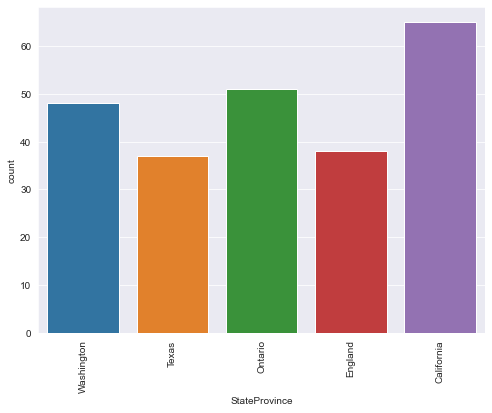

California    65
Ontario       51
Washington    48
England       38
Texas         37
Name: StateProvince, dtype: int64

In [12]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x = top_states_provinces['StateProvince'], data = top_states_provinces)
plt.xticks(rotation = '90')
plt.show ()
#
display(top_states_provinces['StateProvince'].value_counts())

###### 2 - What are the bottom 5 states/provinces for customers ?

In [13]:
bottom_states = ['Idaho','New Mexico','South Dakota','Manitoba','Brunswick'] # Create a List of bottom five State Provinces
bottom_states_provinces = customer_data[customer_data['StateProvince'].isin(bottom_states)] # subsetting data based on specific observations

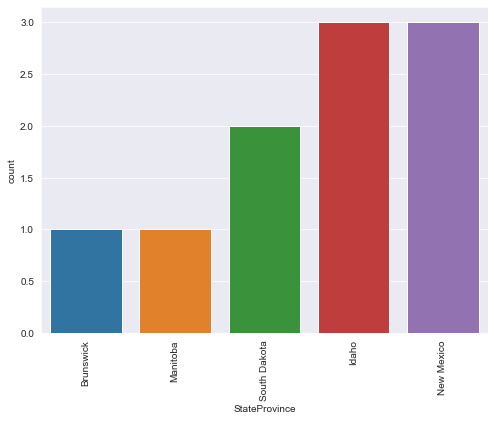

In [14]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x = bottom_states_provinces['StateProvince'], data = bottom_states_provinces)
plt.xticks(rotation = '90')
plt.show ()

###### City

Specific Questions:

What are the top 10 cities for customers

In [15]:
customer_data['City'].value_counts().head(10)

Toronto        23
Montreal       13
London         13
Calgary        11
Mississauga     6
Dallas          6
Richmond        6
Ottawa          5
San Antonio     5
Chicago         5
Name: City, dtype: int64

In [16]:
top_city = ['Toronto','Montreal','London','Calgary','Dallas','Mississauga','Richmond','Ottawa','Burnaby',' San Antonio'] # Create a List of Top five State Provinces
top_cities = customer_data[customer_data['City'].isin(top_city)] # subsetting data based on specific observations

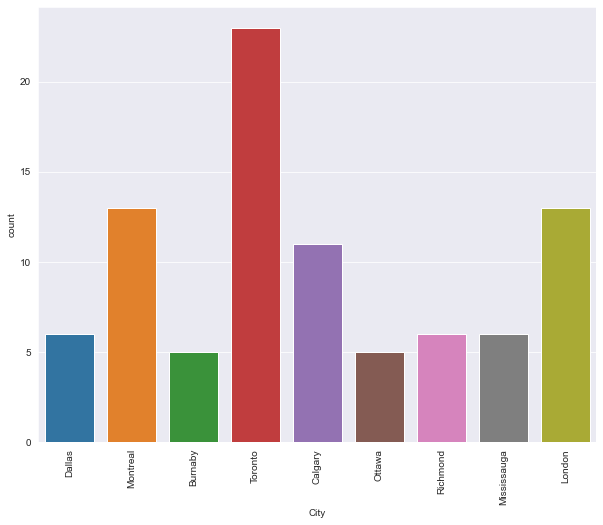

In [17]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(x = top_cities['City'], data = top_cities)
plt.xticks(rotation = '90')
plt.show ()

We wont be creating the same plot for the bottom 10 cities as the count plot will be usless as there are 256 unique cities in which a large majority of them are equal to one. This was noted in our prior dataset analysis.

In order to find a more flexible and efficient way to count occurrences of a character in a Python string, you can also use the Counter object from the built-in collections module. The module provides a number of help classes to work with, well, collections of different items.

##### Updated Task - Pie Chart

NOTE

Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.

Objective

We will access one of the pandas dataframe columns (pandas series) and migrate this data into one of Pythons ordered in built data structures. The order of the data is most important for this specific task.

STEPS

1. We will loop through a pandas series (one column) using iteritems() method and add this data to a Python list (orderd data structure). The data we will add is each time a specific city is in our already sub-setted dataframe from previous. 

2. We will then import the Counter object from the built in collections module and use this to count the number of string (city) occurences in our list.

3. We will convert our counter data structure into a dictionary of key value pairs. Checks have been made to ensure data is ordered during migration. Dictionary is one of Pythons in built data structures, in which Python veriosn 3.7 and above these data strucutures are now ordered. This is important to note - remember we want to keep the order of our data.

4. We will then loop through the dictionary using the items() method and append each key (city) and value (city occurence) to empty lists.

5. We will then use this data to generate a pie chart.

In [18]:
empty_list = [] # initiate empty list
for num,city in top_cities['City'].iteritems(): # iteritems() method generates an iterator object of the DataFrame, allowing us to iterate each column of the DataFrame
    empty_list.append(city)

# convert list to counter to count string occurence in list
collection = Counter(empty_list)

# convert data stucture counter into dictionary
city_dict = dict(collection)

city = [] # initiate empty dictionary
occurence = [] # initiate empty dictionary
for key, value in city_dict.items(): # items() method will return each item in a dictionary as tuples in a list
    city.append(key) # append method will add items to list
    occurence.append(value)

print(city)
print(occurence)

['Dallas', 'Montreal', 'Burnaby', 'Toronto', 'Calgary', 'Ottawa', 'Richmond', 'Mississauga', 'London']
[6, 13, 5, 23, 11, 5, 6, 6, 13]


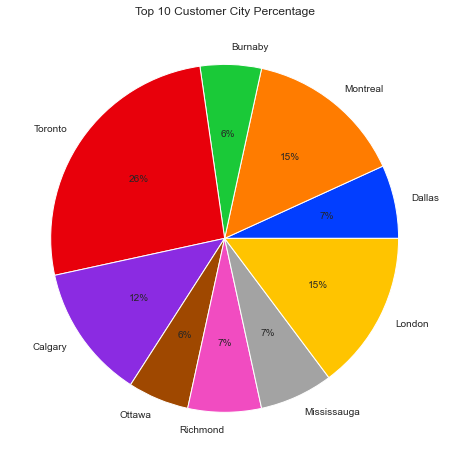

(None,
 Toronto        23
 Montreal       13
 London         13
 Calgary        11
 Mississauga     6
 Dallas          6
 Richmond        6
 Ottawa          5
 San Antonio     5
 Chicago         5
 Name: City, dtype: int64)

In [26]:
# figure size
plt.figure(figsize=(10,8))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(occurence, labels=city, colors=palette_color, autopct='%.0f%%')

# Title
plt.title('Top 10 Customer City Percentage')
  
# displaying chart
plt.show(), customer_data['City'].value_counts().head(10)